In [ ]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nrclex import NRCLex
import pickle
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [38]:
#mengecek data 
df=pd.read_csv('model.csv')
df

,Tweet,translate
0,logo makan minum yg halal mui logo alat yg hal...,halal eating and drinking logo mui halal tools...
1,inikasusnya sprti logo halal produsen konsumen...,"this is the case, like the halal logo, consume..."
2,sebentar pantat babi logo halal hajar tet,halal logo pork butt for a while
3,dar informasi aja aceh gak pakai logo halal mu...,from the information that the king of aceh doe...
4,ganti logo halal nya ya versi,"change the halal logo, yes version"
...,...,...
1082,saran mui jidat yg demo stempel logo halal bia...,Mui Jidat's suggestion who demoed the halal lo...
1083,sat mufti mai habaq kena logo halal,sat mufti mai habaq got the halal logo
1084,neng kalo logo pake khat kufi khat naskhi biar...,bro
1085,tuju mui ganti label logo halal dg logo haram ...,The goal is to replace the halal logo label wi...


In [39]:
#menerapkan alghoritma NRCLexicon
df['emotions'] = df['translate'].apply(lambda x: NRCLex(x).affect_frequencies)
df.head(10)

,Tweet,translate,emotions
0,logo makan minum yg halal mui logo alat yg hal...,halal eating and drinking logo mui halal tools...,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."
1,inikasusnya sprti logo halal produsen konsumen...,"this is the case, like the halal logo, consume...","{'fear': 0.125, 'anger': 0.0625, 'anticip': 0...."
2,sebentar pantat babi logo halal hajar tet,halal logo pork butt for a while,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."
3,dar informasi aja aceh gak pakai logo halal mu...,from the information that the king of aceh doe...,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."
4,ganti logo halal nya ya versi,"change the halal logo, yes version","{'fear': 1.0, 'anger': 0.0, 'anticip': 0.0, 't..."
5,geser libur muharram maulid nabingusik volume ...,Slide off Muharram Maulid Nabi grunts the volu...,"{'fear': 0.16666666666666666, 'anger': 0.0, 'a..."
6,toa masjidlogo halalkini gilir madrasah makhlu...,"Toa masjid logo is halal, now madrasahs are be...","{'fear': 0.4, 'anger': 0.0, 'anticip': 0.0, 't..."
7,si anwarabbas nesu biarin aja gak jalan logo h...,the anwarabbas nesu just let it not work the I...,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."
8,yg kemaren menang tender logo halal kemenag si...,"yesterday, who won the tender for the halal lo...","{'fear': 0.07692307692307693, 'anger': 0.0, 'a..."
9,sirim nak cari makan pasni seluar mesti cop si...,"If you want to look for food, your pants must ...","{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."


In [40]:
#meisahkan untuk dijadikan kolom
df = pd.concat([df.drop(['emotions'], axis = 1), df['emotions'].apply(pd.Series)], axis = 1)
df.head()

,Tweet,translate,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,anticipation
0,logo makan minum yg halal mui logo alat yg hal...,halal eating and drinking logo mui halal tools...,0.000,0.0000,0.0,0.000,0.0000,0.0000,1.000,0.000,0.0000,0.0000,NaN
1,inikasusnya sprti logo halal produsen konsumen...,"this is the case, like the halal logo, consume...",0.125,0.0625,0.0,0.125,0.0625,0.1875,0.125,0.125,0.0625,0.0625,0.0625
2,sebentar pantat babi logo halal hajar tet,halal logo pork butt for a while,0.000,0.0000,0.0,0.000,0.0000,0.0000,1.000,0.000,0.0000,0.0000,NaN
3,dar informasi aja aceh gak pakai logo halal mu...,from the information that the king of aceh doe...,0.000,0.0000,0.0,0.250,0.0000,0.7500,0.000,0.000,0.0000,0.0000,NaN
4,ganti logo halal nya ya versi,"change the halal logo, yes version",1.000,0.0000,0.0,0.000,0.0000,0.0000,0.000,0.000,0.0000,0.0000,NaN


In [41]:
#menghapus colom yang kosong 
del df['anticipation']

In [42]:
df['E_negative']= df['negative'] +df['fear']+df['anger']+df['disgust']+df['sadness']
df['E_positif']= df['positive']+df['surprise']+df['trust']+df['joy']+df['anticip']
df.head()

,Tweet,translate,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,E_negative,E_positif
0,logo makan minum yg halal mui logo alat yg hal...,halal eating and drinking logo mui halal tools...,0.000,0.0000,0.0,0.000,0.0000,0.0000,1.000,0.000,0.0000,0.0000,1.0,0.0000
1,inikasusnya sprti logo halal produsen konsumen...,"this is the case, like the halal logo, consume...",0.125,0.0625,0.0,0.125,0.0625,0.1875,0.125,0.125,0.0625,0.0625,0.5,0.4375
2,sebentar pantat babi logo halal hajar tet,halal logo pork butt for a while,0.000,0.0000,0.0,0.000,0.0000,0.0000,1.000,0.000,0.0000,0.0000,1.0,0.0000
3,dar informasi aja aceh gak pakai logo halal mu...,from the information that the king of aceh doe...,0.000,0.0000,0.0,0.250,0.0000,0.7500,0.000,0.000,0.0000,0.0000,0.0,1.0000
4,ganti logo halal nya ya versi,"change the halal logo, yes version",1.000,0.0000,0.0,0.000,0.0000,0.0000,0.000,0.000,0.0000,0.0000,1.0,0.0000


In [43]:
#melabeli 
def getLabel(pos, neg):
    Labels = []
    for i, v in pos.items():
        label = "Positif" if (v > neg.iloc[i]) else "Negatif"
        Labels.append(label)
    return Labels
df['total'] = getLabel(df['E_positif'], df['E_negative'])
df.head()

,Tweet,translate,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,E_negative,E_positif,total
0,logo makan minum yg halal mui logo alat yg hal...,halal eating and drinking logo mui halal tools...,0.000,0.0000,0.0,0.000,0.0000,0.0000,1.000,0.000,0.0000,0.0000,1.0,0.0000,Negatif
1,inikasusnya sprti logo halal produsen konsumen...,"this is the case, like the halal logo, consume...",0.125,0.0625,0.0,0.125,0.0625,0.1875,0.125,0.125,0.0625,0.0625,0.5,0.4375,Negatif
2,sebentar pantat babi logo halal hajar tet,halal logo pork butt for a while,0.000,0.0000,0.0,0.000,0.0000,0.0000,1.000,0.000,0.0000,0.0000,1.0,0.0000,Negatif
3,dar informasi aja aceh gak pakai logo halal mu...,from the information that the king of aceh doe...,0.000,0.0000,0.0,0.250,0.0000,0.7500,0.000,0.000,0.0000,0.0000,0.0,1.0000,Positif
4,ganti logo halal nya ya versi,"change the halal logo, yes version",1.000,0.0000,0.0,0.000,0.0000,0.0000,0.000,0.000,0.0000,0.0000,1.0,0.0000,Negatif


In [44]:
#mengahpus kolom yang sudah dipakai untuk melabeli
del df['E_positif']
del df['E_negative']


In [45]:
df.head()

,Tweet,translate,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,total
0,logo makan minum yg halal mui logo alat yg hal...,halal eating and drinking logo mui halal tools...,0.000,0.0000,0.0,0.000,0.0000,0.0000,1.000,0.000,0.0000,0.0000,Negatif
1,inikasusnya sprti logo halal produsen konsumen...,"this is the case, like the halal logo, consume...",0.125,0.0625,0.0,0.125,0.0625,0.1875,0.125,0.125,0.0625,0.0625,Negatif
2,sebentar pantat babi logo halal hajar tet,halal logo pork butt for a while,0.000,0.0000,0.0,0.000,0.0000,0.0000,1.000,0.000,0.0000,0.0000,Negatif
3,dar informasi aja aceh gak pakai logo halal mu...,from the information that the king of aceh doe...,0.000,0.0000,0.0,0.250,0.0000,0.7500,0.000,0.000,0.0000,0.0000,Positif
4,ganti logo halal nya ya versi,"change the halal logo, yes version",1.000,0.0000,0.0,0.000,0.0000,0.0000,0.000,0.000,0.0000,0.0000,Negatif


In [46]:
#membeuat corelation matrik untuk melihat kolon yang berpengaruh
df['label'] = df['total'].astype('category').cat.codes
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

C:\Users\dzikri\anaconda3\lib\site-packages\pandas\io\formats\style.py:1264: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
C:\Users\dzikri\anaconda3\lib\site-packages\pandas\io\formats\style.py:1265: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,label
fear,1.000000,0.075183,nan,-0.095172,0.009118,-0.132559,0.078914,0.210399,0.065323,-0.086115,-0.194060
anger,0.075183,1.000000,nan,-0.084042,0.046340,-0.135384,0.248780,0.208354,0.282609,-0.069154,-0.169199
anticip,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
trust,-0.095172,-0.084042,nan,1.000000,0.009869,0.089912,-0.138637,-0.115973,-0.085852,0.134692,0.553810
surprise,0.009118,0.046340,nan,0.009869,1.000000,-0.005764,-0.057577,-0.009133,-0.028463,0.159700,0.227260
positive,-0.132559,-0.135384,nan,0.089912,-0.005764,1.000000,-0.193353,-0.150452,-0.104232,0.209933,0.688330
negative,0.078914,0.248780,nan,-0.138637,-0.057577,-0.193353,1.000000,0.260462,0.265800,-0.139940,-0.284195
sadness,0.210399,0.208354,nan,-0.115973,-0.009133,-0.150452,0.260462,1.000000,0.137665,-0.076969,-0.200328
disgust,0.065323,0.282609,nan,-0.085852,-0.028463,-0.104232,0.265800,0.137665,1.000000,-0.077109,-0.172581
joy,-0.086115,-0.069154,nan,0.134692,0.159700,0.209933,-0.139940,-0.076969,-0.077109,1.000000,0.508771


In [47]:
#kolom tidak berpengaruh pada labeling
del df['anticip']

In [48]:
df.head()

,Tweet,translate,fear,anger,trust,surprise,positive,negative,sadness,disgust,joy,total,label
0,logo makan minum yg halal mui logo alat yg hal...,halal eating and drinking logo mui halal tools...,0.000,0.0000,0.000,0.0000,0.0000,1.000,0.000,0.0000,0.0000,Negatif,0
1,inikasusnya sprti logo halal produsen konsumen...,"this is the case, like the halal logo, consume...",0.125,0.0625,0.125,0.0625,0.1875,0.125,0.125,0.0625,0.0625,Negatif,0
2,sebentar pantat babi logo halal hajar tet,halal logo pork butt for a while,0.000,0.0000,0.000,0.0000,0.0000,1.000,0.000,0.0000,0.0000,Negatif,0
3,dar informasi aja aceh gak pakai logo halal mu...,from the information that the king of aceh doe...,0.000,0.0000,0.250,0.0000,0.7500,0.000,0.000,0.0000,0.0000,Positif,1
4,ganti logo halal nya ya versi,"change the halal logo, yes version",1.000,0.0000,0.000,0.0000,0.0000,0.000,0.000,0.0000,0.0000,Negatif,0


In [49]:
def emotion(x):
    text = NRCLex(x)
    if text.top_emotions[0][1] == 0.0:
        return "No emotion"
    else:
        return text.top_emotions[0][0]
df['Emotion'] = df['translate'].apply(emotion)
df.head()

,Tweet,translate,fear,anger,trust,surprise,positive,negative,sadness,disgust,joy,total,label,Emotion
0,logo makan minum yg halal mui logo alat yg hal...,halal eating and drinking logo mui halal tools...,0.000,0.0000,0.000,0.0000,0.0000,1.000,0.000,0.0000,0.0000,Negatif,0,negative
1,inikasusnya sprti logo halal produsen konsumen...,"this is the case, like the halal logo, consume...",0.125,0.0625,0.125,0.0625,0.1875,0.125,0.125,0.0625,0.0625,Negatif,0,positive
2,sebentar pantat babi logo halal hajar tet,halal logo pork butt for a while,0.000,0.0000,0.000,0.0000,0.0000,1.000,0.000,0.0000,0.0000,Negatif,0,negative
3,dar informasi aja aceh gak pakai logo halal mu...,from the information that the king of aceh doe...,0.000,0.0000,0.250,0.0000,0.7500,0.000,0.000,0.0000,0.0000,Positif,1,positive
4,ganti logo halal nya ya versi,"change the halal logo, yes version",1.000,0.0000,0.000,0.0000,0.0000,0.000,0.000,0.0000,0.0000,Negatif,0,fear


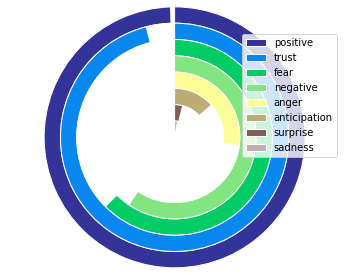

In [50]:

from matplotlib import cm
from math import log10

df_chart = df[df.Emotion != "No emotion"]
labels = df_chart.Emotion.value_counts().index.tolist()
data = df_chart.Emotion.value_counts()
#number of data points
n = len(data)
#find max value for full ring
k = 10 ** int(log10(max(data)))
m = k * (1 + max(data) // k)

#radius of donut chart
r = 1.5
#calculate width of each ring
w = r / n 

#create colors along a chosen colormap
colors = [cm.terrain(i / n) for i in range(n)]

#create figure, axis
fig, ax = plt.subplots()
ax.axis("equal")

#create rings of donut chart
for i in range(n):
    #hide labels in segments with textprops: alpha = 0 - transparent, alpha = 1 - visible
    innerring, _ = ax.pie([m - data[i], data[i]], radius = r - i * w, startangle = 90, labels = ["", labels[i]], labeldistance = 1 - 1 / (1.5 * (n - i)), textprops = {"alpha": 0}, colors = ["white", colors[i]])
    plt.setp(innerring, width = w, edgecolor = "white")

plt.legend()
plt.show()


In [51]:
#menghapus klom yang sudah tidak akan dipakai
del df['translate']
del df['Emotion']

In [52]:
df.head()

,Tweet,fear,anger,trust,surprise,positive,negative,sadness,disgust,joy,total,label
0,logo makan minum yg halal mui logo alat yg hal...,0.000,0.0000,0.000,0.0000,0.0000,1.000,0.000,0.0000,0.0000,Negatif,0
1,inikasusnya sprti logo halal produsen konsumen...,0.125,0.0625,0.125,0.0625,0.1875,0.125,0.125,0.0625,0.0625,Negatif,0
2,sebentar pantat babi logo halal hajar tet,0.000,0.0000,0.000,0.0000,0.0000,1.000,0.000,0.0000,0.0000,Negatif,0
3,dar informasi aja aceh gak pakai logo halal mu...,0.000,0.0000,0.250,0.0000,0.7500,0.000,0.000,0.0000,0.0000,Positif,1
4,ganti logo halal nya ya versi,1.000,0.0000,0.000,0.0000,0.0000,0.000,0.000,0.0000,0.0000,Negatif,0


In [53]:
labels=df['total']
labels

0       Negatif
1       Negatif
2       Negatif
3       Positif
4       Negatif
         ...   
1082    Negatif
1083    Negatif
1084    Negatif
1085    Negatif
1086    Negatif
Name: total, Length: 1087, dtype: object

Negatif    688
Positif    399
Name: total, dtype: int64


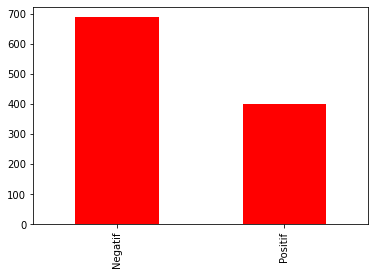

In [54]:
labels_count=labels.value_counts()
labels_count.plot(kind="bar", x='Label',y='Jumlah', color='red')
print(labels.value_counts())

In [55]:
df.head()

,Tweet,fear,anger,trust,surprise,positive,negative,sadness,disgust,joy,total,label
0,logo makan minum yg halal mui logo alat yg hal...,0.000,0.0000,0.000,0.0000,0.0000,1.000,0.000,0.0000,0.0000,Negatif,0
1,inikasusnya sprti logo halal produsen konsumen...,0.125,0.0625,0.125,0.0625,0.1875,0.125,0.125,0.0625,0.0625,Negatif,0
2,sebentar pantat babi logo halal hajar tet,0.000,0.0000,0.000,0.0000,0.0000,1.000,0.000,0.0000,0.0000,Negatif,0
3,dar informasi aja aceh gak pakai logo halal mu...,0.000,0.0000,0.250,0.0000,0.7500,0.000,0.000,0.0000,0.0000,Positif,1
4,ganti logo halal nya ya versi,1.000,0.0000,0.000,0.0000,0.0000,0.000,0.000,0.0000,0.0000,Negatif,0


In [56]:
X = df.iloc[0:,0:10]
Y = df['label']

In [57]:
X.head()

,Tweet,fear,anger,trust,surprise,positive,negative,sadness,disgust,joy
0,logo makan minum yg halal mui logo alat yg hal...,0.000,0.0000,0.000,0.0000,0.0000,1.000,0.000,0.0000,0.0000
1,inikasusnya sprti logo halal produsen konsumen...,0.125,0.0625,0.125,0.0625,0.1875,0.125,0.125,0.0625,0.0625
2,sebentar pantat babi logo halal hajar tet,0.000,0.0000,0.000,0.0000,0.0000,1.000,0.000,0.0000,0.0000
3,dar informasi aja aceh gak pakai logo halal mu...,0.000,0.0000,0.250,0.0000,0.7500,0.000,0.000,0.0000,0.0000
4,ganti logo halal nya ya versi,1.000,0.0000,0.000,0.0000,0.0000,0.000,0.000,0.0000,0.0000


In [58]:
Y

0       0
1       0
2       0
3       1
4       0
       ..
1082    0
1083    0
1084    0
1085    0
1086    0
Name: label, Length: 1087, dtype: int8

In [59]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
X.loc[:,['Tweet','fear','anger','trust','surprise','sadness','negative','positive','disgust','joy']] = \
X.loc[:,['Tweet','fear','anger','trust','surprise','sadness','negative','positive','disgust','joy']].apply(enc.fit_transform)
X.head()

,Tweet,fear,anger,trust,surprise,positive,negative,sadness,disgust,joy
0,617,0,0,0,0,0,42,0,0,0
1,318,13,3,12,4,19,10,14,5,4
2,866,0,0,0,0,0,42,0,0,0
3,162,0,0,24,0,44,0,0,0,0
4,241,33,0,0,0,0,0,0,0,0


In [145]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.4)


In [146]:
nb = MultinomialNB()
nb.fit(X_train, Y_train)
preds = nb.predict(X_test)

In [147]:
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       276
           1       0.95      0.98      0.96       159

    accuracy                           0.97       435
   macro avg       0.97      0.97      0.97       435
weighted avg       0.97      0.97      0.97       435



In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, preds) 

array([[265,   7],
       [  4, 159]], dtype=int64)

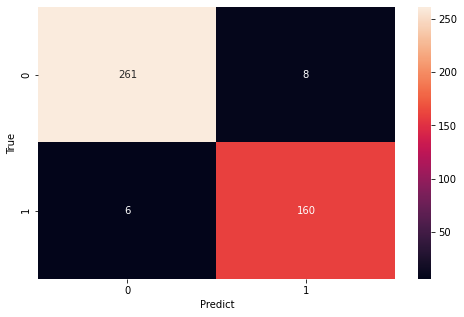

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(Y_test, preds), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predict")
plt.ylabel("True")
plt.show()

In [506]:
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       137
           1       0.95      0.96      0.96        81

    accuracy                           0.97       218
   macro avg       0.96      0.97      0.97       218
weighted avg       0.97      0.97      0.97       218



In [507]:
# POSITIF
tot=df[['total','Tweet']]
tot

bibitpos = tot.drop(tot[tot.total == 'Negatif'].index)
pos=bibitpos['Tweet']
pos

3       dar informasi aja aceh gak pakai logo halal mu...
8       yg kemaren menang tender logo halal kemenag si...
9       sirim nak cari makan pasni seluar mesti cop si...
10           stempel bray pake logo halal biar mak nyisss
13      sya lbih stuju klu logo halal ganti foto si ya...
                              ...                        
1064    owalah nggeh moga cepat halal nggeh bilang nya...
1067                                 pake logo halal prof
1073    usaha aja mayoritas tahan elemen khas logo per...
1076    pusing pokok lihat logo halal logo orang baca ...
1080    saking sibuk urus logo halal toa masjid sih ud...
Name: Tweet, Length: 397, dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

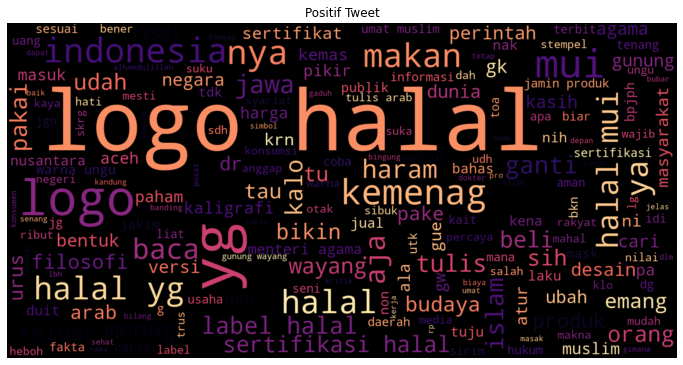

In [509]:
# menampilkan kata yang sering keluar
from wordcloud import WordCloud
allWords = ' '.join(str(twts) for twts in pos)
wordCloud = WordCloud(width=1600, height=800, max_font_size=200, colormap='magma').generate(allWords)
plt.figure(figsize=(12,10)) 
plt.imshow(wordCloud, interpolation="bilinear");
plt.title('Positif Tweet')
plt.axis('off')
plt.show

In [510]:
# NEGATIF
tot2=df[['total','Tweet']]
tot2

bibitneg = tot2.drop(tot2[tot2.total == 'Positif'].index)
neg=bibitneg['Tweet']
neg

0       logo makan minum yg halal mui logo alat yg hal...
1       inikasusnya sprti logo halal produsen konsumen...
2               sebentar pantat babi logo halal hajar tet
4                           ganti logo halal nya ya versi
5       geser libur muharram maulid nabingusik volume ...
                              ...                        
1082    saran mui jidat yg demo stempel logo halal bia...
1083                  sat mufti mai habaq kena logo halal
1084    neng kalo logo pake khat kufi khat naskhi biar...
1085    tuju mui ganti label logo halal dg logo haram ...
1086          anda uang trilyunan rupiah balik logo halal
Name: Tweet, Length: 690, dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

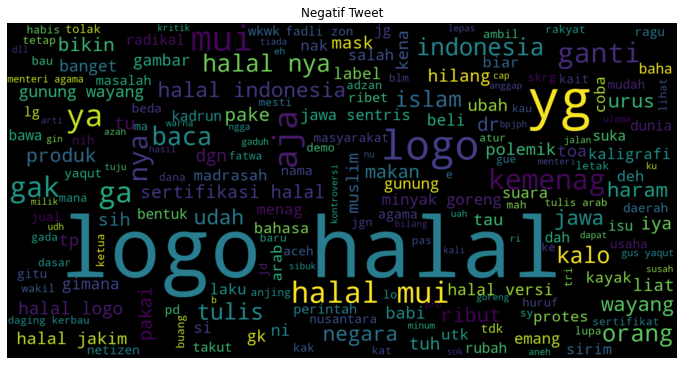

In [512]:
# menampilkan kata yang sering keluar
from wordcloud import WordCloud
allWords = ' '.join(str(twts) for twts in neg)
wordCloud = WordCloud(width = 1600, height = 800,random_state = 21, max_font_size = 200).generate(allWords)
plt.figure(figsize=(12,10))
plt.imshow(wordCloud, interpolation="bilinear");
plt.title('Negatif Tweet')
plt.axis('off')
plt.show